In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import pandas as pd
import rubin_sim.maf as maf
import sys
import glob
from natsort import natsorted
import os

In [2]:
nside = 256
pix_area = hp.pixelfunc.nside2pixarea(nside, degrees=True) # square degrees

baseline = "first_year_baseline_v3_4_10yrs_db_noDD_noTwi"
tscale = 3
metric = "CountMetric"
savedir = "{}_nside_{}_t-{}d_{}".format(baseline,nside,tscale,metric)
data_path = "/home/jrobinson/rubin_templates/remove_no_template_results_{}_{}".format(nside,baseline)

# set up save path
save_path = "plot_template_coverage_figs/{}".format(savedir)
if not os.path.isdir(save_path):
    print("mkdir {}".format(save_path))
    os.mkdir(save_path)
fname = "{}/df_template_coverage.csv".format(save_path)

if os.path.isfile(fname):
    df_filt = pd.read_csv(fname, index_col = 0)
else:
    data_list = []
    for filt in ["all","u","g","r","i","z","y"]:

        if filt=="all":
            _filt=""
        else:
            _filt = "_{}_and".format(filt)

        # get all metrics for the filter and baseline (in that tscale)
        metric_fname = "{}_tscale-{}_nside-{}_{}{}_night_lt_*_and_note_not_like_DD_and_note_not_like_twilight_HEAL.npz".format(
                            baseline,tscale,nside,metric,_filt)
        metric_files = glob.glob("{}/{}".format(data_path,metric_fname))
        metric_files = natsorted(metric_files)
        print(filt,len(metric_files))

        data = {"metric":"",
            "filt":filt,
           "lt_t(d)":0,
           "npix":0}
        data_list.append(data)

        for i in range(len(metric_files)):

            mb = maf.MetricBundle.load(metric_files[i])
            data = mb.metric_values.data
            mask = mb.metric_values.mask
            metric_vals = np.ma.array(data, mask=mask)

            # replace the masked values with nan
            metric_vals.fill_value = np.nan

            metric_fname = mb.file_root    

            npix = len(metric_vals.compressed())
            t = int(metric_files[i].split("_lt_")[-1].split("_")[0])

            print(len(metric_vals),npix)

            data = {"metric":metric_files[i],
                    "filt":filt,
                   "lt_t(d)":t,
                   "npix":npix}

            data_list.append(data)

            # if i>5:
            #     break

    df = pd.DataFrame(data_list)

    df_filt = pd.DataFrame({"lt_t(d)":np.unique(df["lt_t(d)"])})
    for filt in np.unique(df["filt"]):
        _df = df[df['filt']==filt].sort_values("lt_t(d)")
        df_filt["npix_{}".format(filt)] = np.array(_df["npix"])

    print("save {}".format(fname))
    df_filt.to_csv(fname)

all 122
Healpix slicer using NSIDE=256, approximate resolution 13.741946 arcminutes
786432 109852
Healpix slicer using NSIDE=256, approximate resolution 13.741946 arcminutes
786432 161336
Healpix slicer using NSIDE=256, approximate resolution 13.741946 arcminutes
786432 200094
Healpix slicer using NSIDE=256, approximate resolution 13.741946 arcminutes
786432 226435
Healpix slicer using NSIDE=256, approximate resolution 13.741946 arcminutes
786432 227708
Healpix slicer using NSIDE=256, approximate resolution 13.741946 arcminutes
786432 238646
Healpix slicer using NSIDE=256, approximate resolution 13.741946 arcminutes
786432 246447
Healpix slicer using NSIDE=256, approximate resolution 13.741946 arcminutes
786432 246502
Healpix slicer using NSIDE=256, approximate resolution 13.741946 arcminutes
786432 249538
Healpix slicer using NSIDE=256, approximate resolution 13.741946 arcminutes
786432 249538
Healpix slicer using NSIDE=256, approximate resolution 13.741946 arcminutes
786432 256403
He

In [3]:
df_filt

,lt_t(d),npix_all,npix_g,npix_i,npix_r,npix_u,npix_y,npix_z
0,0,0,0,0,0,0,0,0
1,3,109852,89349,23806,73518,83205,6178,25515
2,6,161336,126028,61923,138889,83205,32514,56264
3,9,200094,128003,82299,146172,83205,142456,91323
4,12,226435,128004,124483,146182,83205,195641,142413
...,...,...,...,...,...,...,...,...
118,354,534128,530239,532369,532041,472595,474805,531777
119,357,534135,530240,532414,532100,472598,474809,531792
120,360,534147,530299,532425,532141,472598,474846,531793
121,363,534159,530299,532427,532141,472598,474981,531827


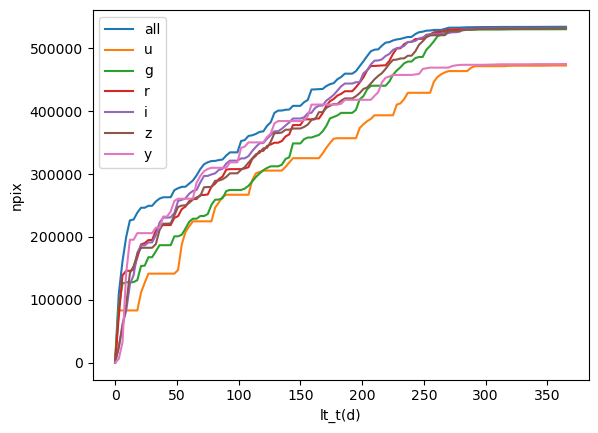

In [4]:
x_plot = "lt_t(d)"

fig = plt.figure()
gs = gridspec.GridSpec(1,1)
ax1 = plt.subplot(gs[0,0])

for filt in ["all","u","g","r","i","z","y"]:
    ax1.plot(df_filt[x_plot],df_filt["npix_{}".format(filt)], label = filt)

ax1.legend()

ax1.set_xlabel(x_plot)
ax1.set_ylabel("npix")

plt.show()

In [5]:
# see plot_template_coverage.ipynb for how to determine the coverage cumulatively with in the template generation sims

In [6]:
# convert to 28 day tscale

In [7]:
df_filt

,lt_t(d),npix_all,npix_g,npix_i,npix_r,npix_u,npix_y,npix_z
0,0,0,0,0,0,0,0,0
1,3,109852,89349,23806,73518,83205,6178,25515
2,6,161336,126028,61923,138889,83205,32514,56264
3,9,200094,128003,82299,146172,83205,142456,91323
4,12,226435,128004,124483,146182,83205,195641,142413
...,...,...,...,...,...,...,...,...
118,354,534128,530239,532369,532041,472595,474805,531777
119,357,534135,530240,532414,532100,472598,474809,531792
120,360,534147,530299,532425,532141,472598,474846,531793
121,363,534159,530299,532427,532141,472598,474981,531827


In [8]:
np.unique(df_filt["lt_t(d)"])

array([  0,   3,   6,   9,  12,  15,  18,  21,  24,  27,  30,  33,  36,
        39,  42,  45,  48,  51,  54,  57,  60,  63,  66,  69,  72,  75,
        78,  81,  84,  87,  90,  93,  96,  99, 102, 105, 108, 111, 114,
       117, 120, 123, 126, 129, 132, 135, 138, 141, 144, 147, 150, 153,
       156, 159, 162, 165, 168, 171, 174, 177, 180, 183, 186, 189, 192,
       195, 198, 201, 204, 207, 210, 213, 216, 219, 222, 225, 228, 231,
       234, 237, 240, 243, 246, 249, 252, 255, 258, 261, 264, 267, 270,
       273, 276, 279, 282, 285, 288, 291, 294, 297, 300, 303, 306, 309,
       312, 315, 318, 321, 324, 327, 330, 333, 336, 339, 342, 345, 348,
       351, 354, 357, 360, 363, 365])

In [33]:
tstep = 30
df_filt_t = df_filt[np.isin(df_filt["lt_t(d)"],np.arange(0,360+tstep,tstep))].reset_index(drop=True)
df_filt_t

,lt_t(d),npix_all,npix_g,npix_i,npix_r,npix_u,npix_y,npix_z
0,0,0,0,0,0,0,0,0
1,30,249538,167835,191351,195109,141710,206096,182862
2,60,284856,224072,268737,256942,216921,260782,254254
3,90,329522,273121,316731,307073,267126,309998,295522
4,120,367853,306103,349285,336984,305505,350379,340881
5,150,408472,348710,388357,377908,325253,384320,372440
6,180,450774,393350,432766,424833,357012,410526,411248
7,210,497788,440488,480305,471922,393492,424230,450681
8,240,518012,478897,510366,510292,429204,457622,488163
9,270,532655,527699,524297,529717,463739,469298,527048


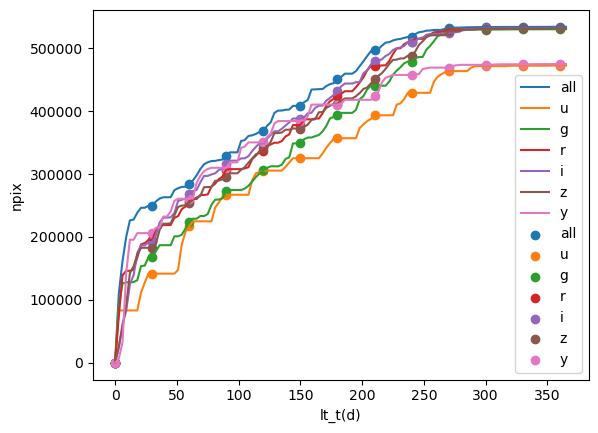

In [34]:
x_plot = "lt_t(d)"

fig = plt.figure()
gs = gridspec.GridSpec(1,1)
ax1 = plt.subplot(gs[0,0])

for filt in ["all","u","g","r","i","z","y"]:
    ax1.plot(df_filt[x_plot],df_filt["npix_{}".format(filt)], label = filt)

for filt in ["all","u","g","r","i","z","y"]:
    ax1.scatter(df_filt_t[x_plot],df_filt_t["npix_{}".format(filt)], label = filt)
    
ax1.legend()

ax1.set_xlabel(x_plot)
ax1.set_ylabel("npix")

plt.show()

In [35]:
for filt in ["all","u","g","r","i","z","y"]:
    df_filt_t.loc[:,"area_{}".format(filt)] = df_filt_t["npix_{}".format(filt)] * pix_area

In [37]:
df_filt_t.columns

Index(['lt_t(d)', 'npix_all', 'npix_g', 'npix_i', 'npix_r', 'npix_u', 'npix_y',
       'npix_z', 'area_all', 'area_u', 'area_g', 'area_r', 'area_i', 'area_z',
       'area_y'],
      dtype='object')

In [ ]:
cols = ['lt_t(d)', 'area_all', 'area_u', 'area_g', 'area_r', 'area_i', 'area_z', 'area_y']
# rename_dict = {'lt_t(d)':'night(d)', 
#                'area_all':'area (all, deg$^2$)', 
#                'area_u':'area ($u$, deg$^2$)', 
#                'area_g':'area ($g$, deg$^2$)', 
#                'area_r':'area ($r$, deg$^2$)', 
#                'area_i':'area ($i$, deg$^2$)', 
#                'area_z':'area ($z$, deg$^2$)', 
#                'area_y':'area ($y$, deg$^2$)'}

# rename_dict = {'lt_t(d)':'night(d)', 
#                'area_all':'all(deg$^2$)', 
#                'area_u':'$u$(deg$^2$)', 
#                'area_g':'$g$(deg$^2$)', 
#                'area_r':'$r$(deg$^2$)', 
#                'area_i':'$i$(deg$^2$)', 
#                'area_z':'$z$(deg$^2$)', 
#                'area_y':'$y$(deg$^2$)'}

rename_dict = {'lt_t(d)':'night$<$(d)', 
               'area_all':'all', 
               'area_u':'$u$', 
               'area_g':'$g$', 
               'area_r':'$r$', 
               'area_i':'$i$', 
               'area_z':'$z$', 
               'area_y':'$y$'}

fmts = {"$u$":'{:.0f}'.format,
        "$g$":'{:.0f}'.format,
        "$r$":'{:.0f}'.format,
        "$i$":'{:.0f}'.format,
        "$z$":'{:.0f}'.format,
        "$y$":'{:.0f}'.format,
        "all":'{:.0f}'.format}

df_tab = df_filt_t.copy()[cols].rename(rename_dict,axis=1)

# set up multiindex columns
_x = "cumulative unique area (square degrees)"
x = np.array([""]+([_x]*7) + list(df_tab.columns))
y = df_tab.columns
print(df_tab.columns)
tuples = list(zip(*[x,y]))
index = pd.MultiIndex.from_tuples(tuples)
print(index)
df_tab.columns = index

for cl in [_x]:    
    for x in ['all', '$u$', '$g$', '$r$', '$i$', '$z$', '$y$']:
        _df = df_tab[cl].copy()
        _df[x] = _df[x].map('{:.1f}'.format)        
        df_tab[cl] = _df
        
fname = "{}/area_filt_table.txt".format(save_path)
print(fname)
with open(fname,"w") as f:
    f.write(df_tab.to_latex(index=False,escape=False, na_rep = "",
#                              column_format = "l|rrr|rrr|rrr",
#                             multicolumn_format = "l|"
#                                              column_format = "r|rrrrrrr",
                            multicolumn_format = "c"
                           ))

In [ ]:
df_tab


In [58]:
df_tab.columns

Index(['night<(d)', 'all', '$u$', '$g$', '$r$', '$i$', '$z$', '$y$'], dtype='object')

In [59]:
[""] + [_x]*7 + list(df_tab.columns)

['',
 'cumulative unique area (square degrees)',
 'cumulative unique area (square degrees)',
 'cumulative unique area (square degrees)',
 'cumulative unique area (square degrees)',
 'cumulative unique area (square degrees)',
 'cumulative unique area (square degrees)',
 'cumulative unique area (square degrees)',
 'night<(d)',
 'all',
 '$u$',
 '$g$',
 '$r$',
 '$i$',
 '$z$',
 '$y$']

MultiIndex([(                                       '', 'night<(d)'),
            ('cumulative unique area (square degrees)',       'all'),
            ('cumulative unique area (square degrees)',       '$u$'),
            ('cumulative unique area (square degrees)',       '$g$'),
            ('cumulative unique area (square degrees)',       '$r$'),
            ('cumulative unique area (square degrees)',       '$i$'),
            ('cumulative unique area (square degrees)',       '$z$'),
            ('cumulative unique area (square degrees)',       '$y$')],
           )


In [61]:
df_tab

cumulative unique area (square degrees)                \
   night<(d)                                     all           $u$   
0          0                                0.000000      0.000000   
1         30                            13089.728602   7433.518904   
2         60                            14942.364413  11378.776051   
3         90                            17285.357535  14012.322142   
4        120                            19296.042829  16025.525318   
5        150                            21426.747115  17061.423499   
6        180                            23645.734602  18727.368929   
7        210                            26111.894066  20640.958440   
8        240                            27172.761234  22514.261856   
9        270                            27940.872287  24325.824734   
10       300                            27999.780210  24737.288443   
11       330                            28008.697705  24776.000862   
12       360                            28019.136419  24790.531134   

                                                                          
             $g$           $r$           $i$           $z$           $y$  
0       0.000000      0.000000      0.000000      0.000000      0.000000  
1    8803.928059  10234.608989  10037.479894   9592.182159  10810.941444  
2   11753.887854  13478.111737  14096.828521  13337.110404  13679.542212  
3   14326.794980  16107.776095  16614.394721  15501.858539  16261.209464  
4   16056.893918  17676.783109  18322.042554  17881.203567  18379.429257  
5   18291.880439  19823.486430  20371.597636  19536.657826  20159.833358  
6   20633.509709  22284.977323  22701.109604  21572.364563  21534.491437  
7   23106.173699  24755.070977  25194.808391  23640.856207  22253.346444  
8   25120.950551  26767.802050  26771.683783  25607.006483  24004.952282  
9   27680.901080  27786.756991  27502.446269  27646.752320  24617.426819  
10  27789.274872  27868.955313  27891.878520  27859.460803  24853.268334  
11  27810.467037  27889.780286  27908.349658  27883.590496  24891.351283  
12  27817.286298  27913.909979  27928.807441  27895.655342  24908.451891